**Load the required libraries**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load Dataset**

In [42]:
df = pd.read_csv('ObesityDataSet.csv')

In [43]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [44]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3,3,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


# **Exploratory Data Analysis**

**Identify the shape of dataset**

In [45]:
df.shape

(2111, 17)

**Get the list of columns**

In [46]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**Get basic dataset information**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

**Dataset visualization**

In [48]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [49]:
print(numerical_features)


['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


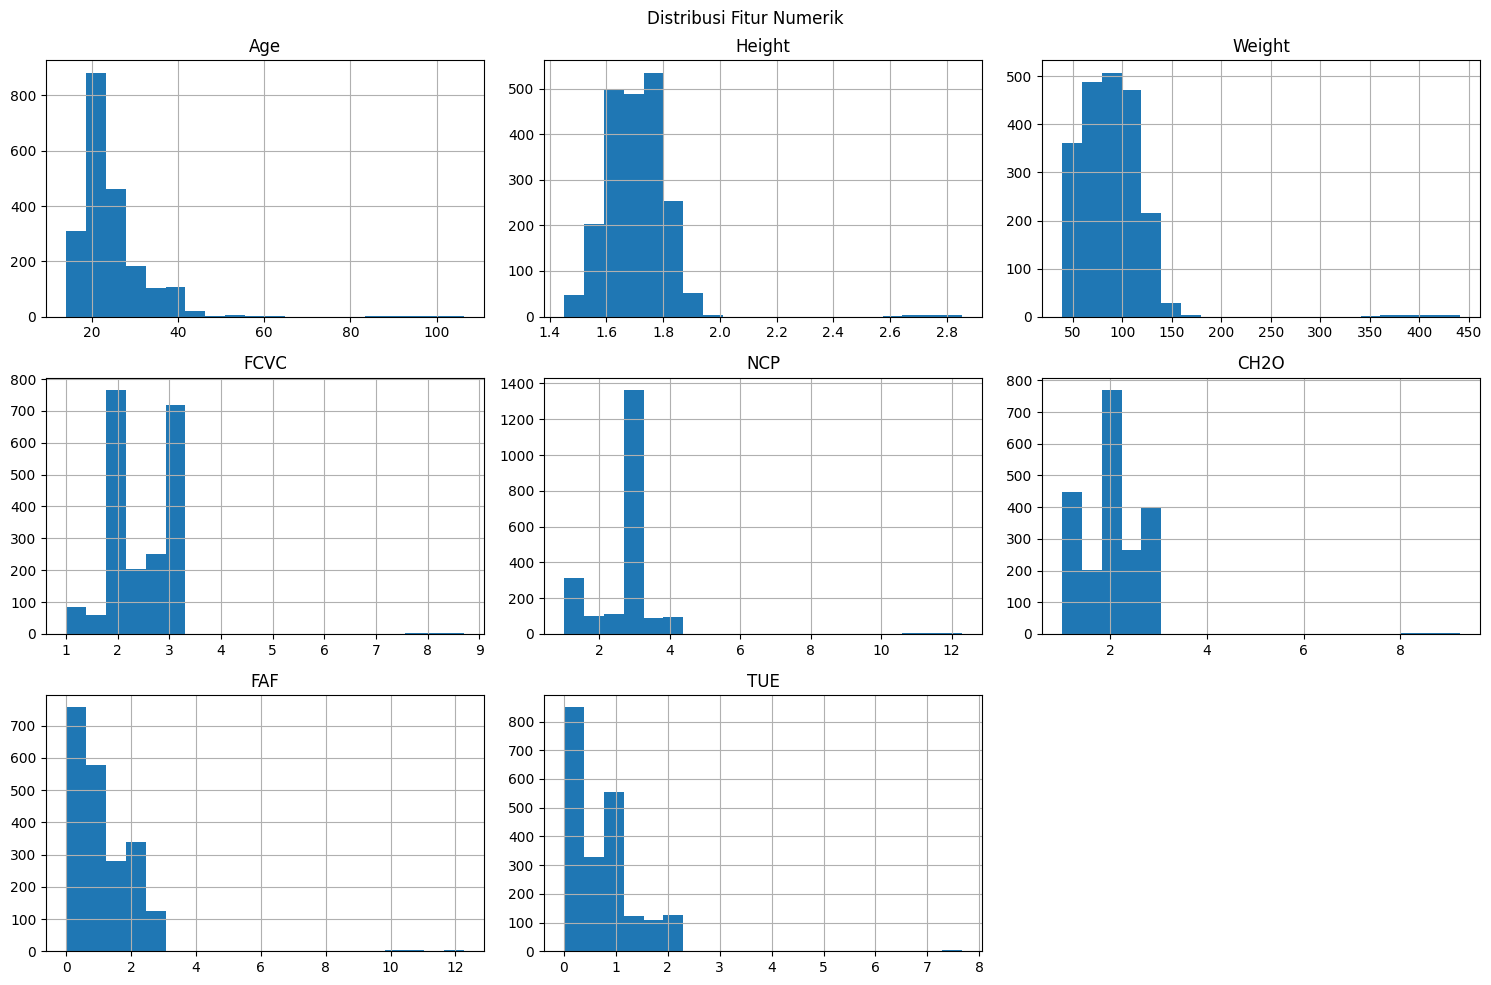

In [50]:
df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()

In [51]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


<ipython-input-52-c39ab4dba0e7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="NObeyesdad", palette="Set2", edgecolor='black', order=df["NObeyesdad"].value_counts().index)


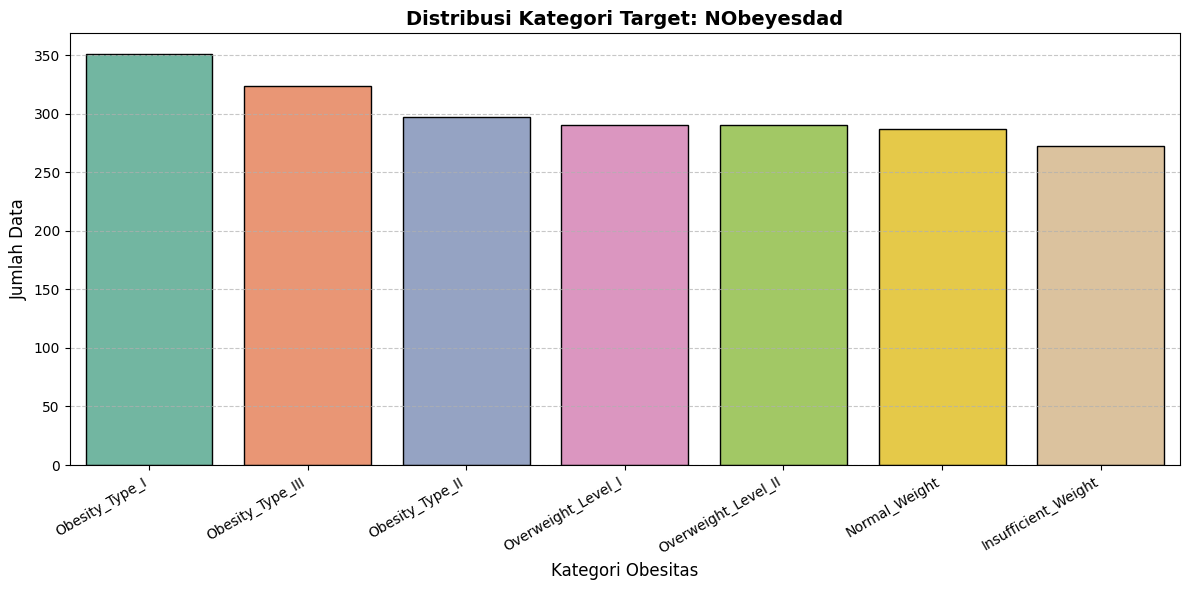

In [52]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="NObeyesdad", palette="Set2", edgecolor='black', order=df["NObeyesdad"].value_counts().index)
plt.xlabel("Kategori Obesitas", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)
plt.title("Distribusi Kategori Target: NObeyesdad", fontsize=14, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**unique value**

In [53]:
for col in df.columns:
    print(f"Kolom: {col} - Jumlah Nilai Unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")
    print("-" * 40)

Kolom: Age - Jumlah Nilai Unik: 1393
Nilai unik: [21.       23.       27.       ... 22.524036 24.361936 23.664709]
----------------------------------------
Kolom: Gender - Jumlah Nilai Unik: 3
Nilai unik: ['Female' 'Male' '?' nan]
----------------------------------------
Kolom: Height - Jumlah Nilai Unik: 1561
Nilai unik: [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
----------------------------------------
Kolom: Weight - Jumlah Nilai Unik: 1517
Nilai unik: [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
----------------------------------------
Kolom: CALC - Jumlah Nilai Unik: 5
Nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
----------------------------------------
Kolom: FAVC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?' nan]
----------------------------------------
Kolom: FCVC - Jumlah Nilai Unik: 807
Nilai unik: [2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.5

**Identify missing values**

In [54]:
df.isnull().sum()

,0
Age,22
Gender,9
Height,22
Weight,19
CALC,5
FAVC,11
FCVC,18
NCP,22
SCC,10
SMOKE,5


In [55]:
(df.isnull().sum()/(len(df)))*100

,0
Age,1.042160
Gender,0.426338
Height,1.042160
Weight,0.900047
CALC,0.236855
FAVC,0.521080
FCVC,0.852676
NCP,1.042160
SCC,0.473709
SMOKE,0.236855


**Identify duplicate entries/ rows**

In [56]:
df.shape

(2111, 17)

In [57]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 18


In [58]:
df[df.duplicated()]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
663,21.0,Female,1.52,42.0,Sometimes,yes,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
763,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
764,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
824,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I


**Target class balance**

In [59]:
print(df["NObeyesdad"].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


**Outlier**

<ipython-input-60-974912100187>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
<ipython-input-60-974912100187>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
<ipython-input-60-974912100187>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
<ipython-input-60-974912100187>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns

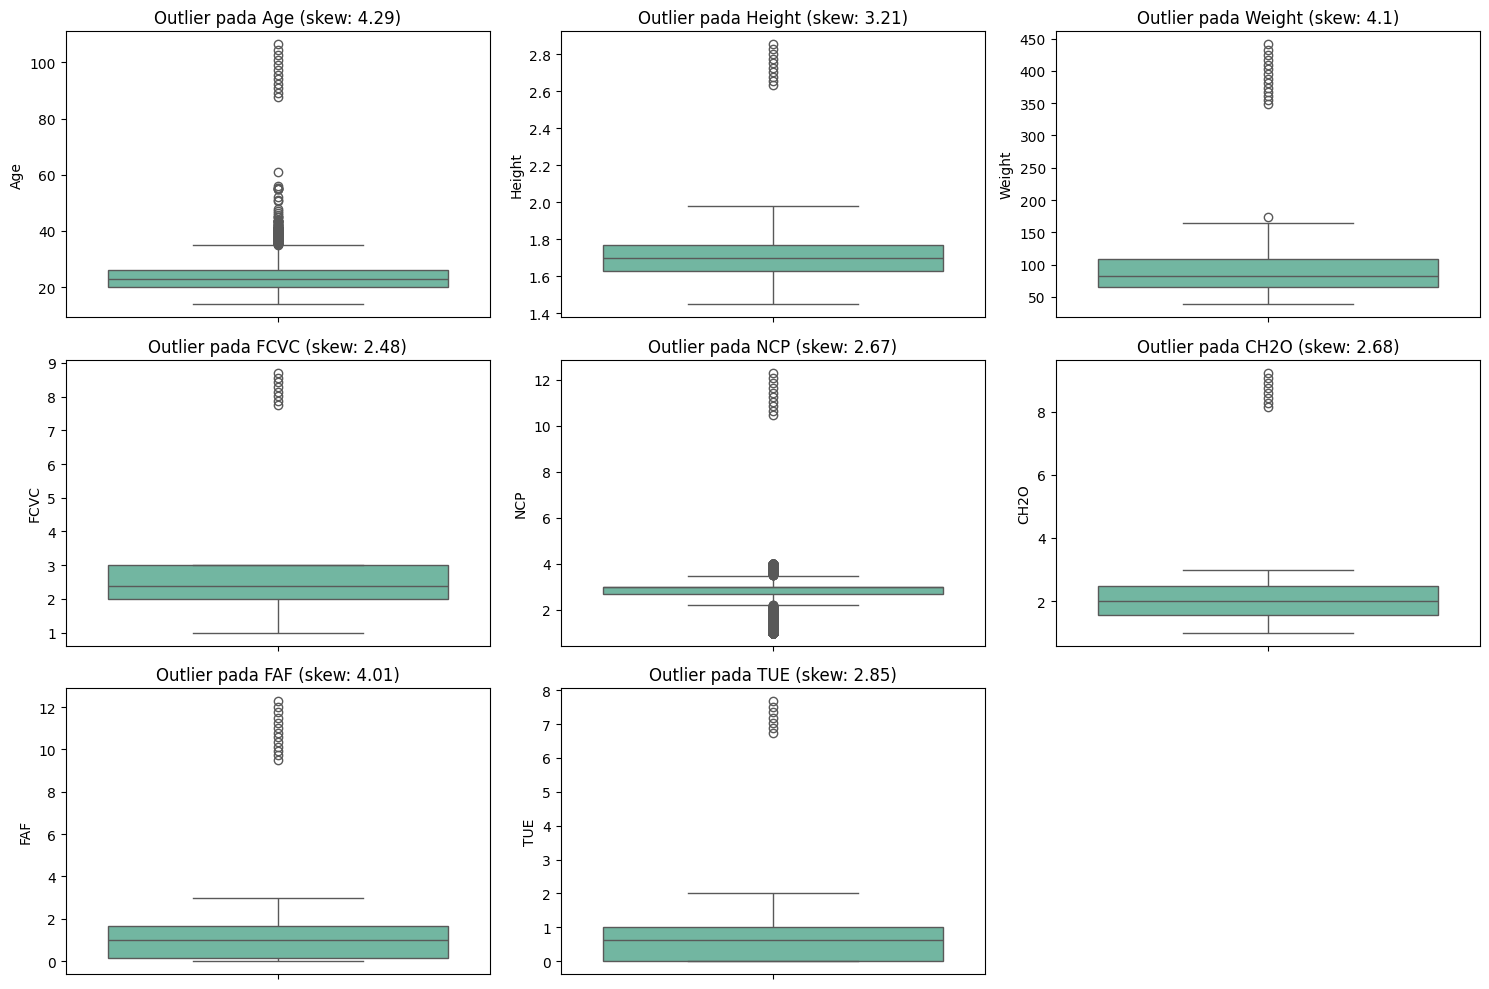

In [60]:
plt.figure(figsize=(15, 10))

max_plots = min(len(numerical_features), 9)  # Maksimal 9 subplot (3x3)
for i, col in enumerate(numerical_features[:max_plots], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], palette='Set2')
    skewness = round(df[col].skew(skipna=True), 2)
    plt.title(f'Outlier pada {col} (skew: {skewness})')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# **Preprocessing**

**Remove missing values**

In [61]:
df_bersih = df.dropna()

In [62]:
df_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1889 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1889 non-null   float64
 1   Gender                          1889 non-null   object 
 2   Height                          1889 non-null   float64
 3   Weight                          1889 non-null   float64
 4   CALC                            1889 non-null   object 
 5   FAVC                            1889 non-null   object 
 6   FCVC                            1889 non-null   float64
 7   NCP                             1889 non-null   float64
 8   SCC                             1889 non-null   object 
 9   SMOKE                           1889 non-null   object 
 10  CH2O                            1889 non-null   float64
 11  family_history_with_overweight  1889 non-null   object 
 12  FAF                             1889 no

**Delete duplicate data**

In [63]:
df_bersih = df_bersih.drop_duplicates()

In [64]:
df_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1871 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1871 non-null   float64
 1   Gender                          1871 non-null   object 
 2   Height                          1871 non-null   float64
 3   Weight                          1871 non-null   float64
 4   CALC                            1871 non-null   object 
 5   FAVC                            1871 non-null   object 
 6   FCVC                            1871 non-null   float64
 7   NCP                             1871 non-null   float64
 8   SCC                             1871 non-null   object 
 9   SMOKE                           1871 non-null   object 
 10  CH2O                            1871 non-null   float64
 11  family_history_with_overweight  1871 non-null   object 
 12  FAF                             1871 no

**Check unique values**

In [65]:
for col in df_bersih.columns:
    print(f"Kolom: {col} - Jumlah Nilai Unik: {df_bersih[col].nunique()}")
    print(f"Nilai unik: {df_bersih[col].unique()}")
    print("-" * 40)

Kolom: Age - Jumlah Nilai Unik: 1261
Nilai unik: [21.       23.       27.       ... 22.524036 24.361936 23.664709]
----------------------------------------
Kolom: Gender - Jumlah Nilai Unik: 3
Nilai unik: ['Female' 'Male' '?']
----------------------------------------
Kolom: Height - Jumlah Nilai Unik: 1416
Nilai unik: [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
----------------------------------------
Kolom: Weight - Jumlah Nilai Unik: 1372
Nilai unik: [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
----------------------------------------
Kolom: CALC - Jumlah Nilai Unik: 5
Nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always']
----------------------------------------
Kolom: FAVC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?']
----------------------------------------
Kolom: FCVC - Jumlah Nilai Unik: 731
Nilai unik: [2.         3.         1.         8.14899274 8.42397393 2.450218
 2.880161   2.00876    2.596579   2.591439   2.392665   1.1239

In [66]:
kolom_unik = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

for col in kolom_unik:
    print(f"Kolom: {col} - Jumlah Nilai Unik: {df_bersih[col].nunique()}")
    print(f"Nilai unik: {df_bersih[col].unique()}")
    print("-" * 40)

Kolom: Gender - Jumlah Nilai Unik: 3
Nilai unik: ['Female' 'Male' '?']
----------------------------------------
Kolom: CALC - Jumlah Nilai Unik: 5
Nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always']
----------------------------------------
Kolom: FAVC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?']
----------------------------------------
Kolom: SCC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?']
----------------------------------------
Kolom: SMOKE - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?']
----------------------------------------
Kolom: family_history_with_overweight - Jumlah Nilai Unik: 3
Nilai unik: ['yes' 'no' '?']
----------------------------------------
Kolom: CAEC - Jumlah Nilai Unik: 5
Nilai unik: ['Sometimes' 'Frequently' 'Always' 'no' '?']
----------------------------------------
Kolom: MTRANS - Jumlah Nilai Unik: 6
Nilai unik: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' '?']
----------------------------------------
Kolom: NObeyes

In [67]:
# Bersihkan spasi di awal/akhir untuk semua kolom bertipe objek (string)
for kolom in df_bersih.select_dtypes(include='object').columns:
    df_bersih[kolom] = df_bersih[kolom].str.strip()

# Ganti semua tanda tanya dengan nilai NaN
df_bersih.replace(to_replace="?", value=np.nan, inplace=True)

# Imputasi nilai hilang dengan nilai paling sering (modus) untuk kolom kategorikal
kolom_objek = df_bersih.select_dtypes(include='object').columns
for kol in kolom_objek:
    if df_bersih[kol].isnull().any():
        nilai_terbanyak = df_bersih[kol].mode(dropna=True)[0]
        df_bersih[kol] = df_bersih[kol].fillna(nilai_terbanyak)

# Cek apakah masih ada nilai NaN setelah proses imputasi
jumlah_nan = df_bersih.isna().sum()
print("Sisa nilai yang hilang per kolom:\n", jumlah_nan)


Sisa nilai yang hilang per kolom:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


**Handle outlier**

In [68]:
df_bersih.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,24.770383,1.708407,89.017473,2.447022,2.753488,2.030647,1.082590,0.684811
std,8.624885,0.120062,37.246267,0.652882,0.990781,0.746956,1.181643,0.730294
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.952931,1.630000,65.328560,2.000000,2.734392,1.584812,0.119641,0.000000
50%,22.804818,1.704193,83.016968,2.397280,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.770468,108.224463,3.000000,3.000000,2.473548,1.697675,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [69]:
for col in numerical_features:
    Q1 = df_bersih[col].quantile(0.25)
    Q3 = df_bersih[col].quantile(0.75)
    IQR = Q3 - Q1
    df_bersih = df_bersih[(df_bersih[col] >= Q1 - 1.5*IQR) & (df_bersih[col] <= Q3 + 1.5*IQR)]


In [70]:
df_bersih.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
mean,23.144453,1.715131,92.504880,2.456863,2.976889,2.060705,1.031469,0.693352
std,4.102400,0.087400,27.473986,0.546924,0.115006,0.601654,0.855703,0.586877
min,14.000000,1.450000,39.000000,1.000000,2.390070,1.000000,0.000000,0.000000
25%,20.000000,1.649546,70.110694,2.000000,3.000000,1.734719,0.143955,0.105905
50%,22.760437,1.717688,91.132174,2.557486,3.000000,2.000000,1.000000,0.681950
75%,25.982224,1.774931,113.047888,3.000000,3.000000,2.553805,1.630179,1.000000
max,35.000000,1.980000,173.000000,3.000000,3.362758,3.000000,3.000000,2.000000


**Encoding**

In [71]:
kolom_unik = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

for col in kolom_unik:
    print(f"Kolom: {col} - Jumlah Nilai Unik: {df_bersih[col].nunique()}")
    print(f"Nilai unik: {df_bersih[col].unique()}")
    print("-" * 40)

Kolom: Gender - Jumlah Nilai Unik: 2
Nilai unik: ['Female' 'Male']
----------------------------------------
Kolom: CALC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'Sometimes' 'Frequently']
----------------------------------------
Kolom: FAVC - Jumlah Nilai Unik: 2
Nilai unik: ['no' 'yes']
----------------------------------------
Kolom: SCC - Jumlah Nilai Unik: 2
Nilai unik: ['no' 'yes']
----------------------------------------
Kolom: SMOKE - Jumlah Nilai Unik: 2
Nilai unik: ['no' 'yes']
----------------------------------------
Kolom: family_history_with_overweight - Jumlah Nilai Unik: 2
Nilai unik: ['yes' 'no']
----------------------------------------
Kolom: CAEC - Jumlah Nilai Unik: 4
Nilai unik: ['Sometimes' 'Frequently' 'Always' 'no']
----------------------------------------
Kolom: MTRANS - Jumlah Nilai Unik: 5
Nilai unik: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
----------------------------------------
Kolom: NObeyesdad - Jumlah Nilai Unik: 7
Nilai unik: ['

In [72]:
# Binary encoding (2 kategori)
df_bersih['Gender'] = df_bersih['Gender'].map({'Female': 0, 'Male': 1})
df_bersih['FAVC'] = df_bersih['FAVC'].map({'no': 0, 'yes': 1})
df_bersih['SCC'] = df_bersih['SCC'].map({'no': 0, 'yes': 1})
df_bersih['SMOKE'] = df_bersih['SMOKE'].map({'no': 0, 'yes': 1})
df_bersih['family_history_with_overweight'] = df_bersih['family_history_with_overweight'].map({'no': 0, 'yes': 1})

# Ordinal encoding (ada urutan)
df_bersih['CALC'] = df_bersih['CALC'].map({
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2
})

df_bersih['CAEC'] = df_bersih['CAEC'].map({
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3
})

# One-Hot encoding untuk transportasi (tanpa urutan)
df_bersih = pd.get_dummies(df_bersih, columns=['MTRANS'])

# Label encoding untuk target (multiclass)
df_bersih['NObeyesdad'] = df_bersih['NObeyesdad'].map({
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
})



In [73]:
df_bersih.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,...,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,0,1.62,64.0,0,0,2.0,3.0,0,0,...,1,0.0,1.0,1,1,False,False,False,True,False
1,21.0,0,1.52,56.0,1,0,3.0,3.0,1,1,...,1,3.0,0.0,1,1,False,False,False,True,False
2,23.0,1,1.80,77.0,2,0,2.0,3.0,0,0,...,1,2.0,1.0,1,1,False,False,False,True,False
3,27.0,1,1.80,87.0,2,0,3.0,3.0,0,0,...,0,2.0,0.0,1,2,False,False,False,False,True
5,29.0,1,1.62,53.0,1,1,2.0,3.0,0,0,...,0,0.0,0.0,1,1,True,False,False,False,False


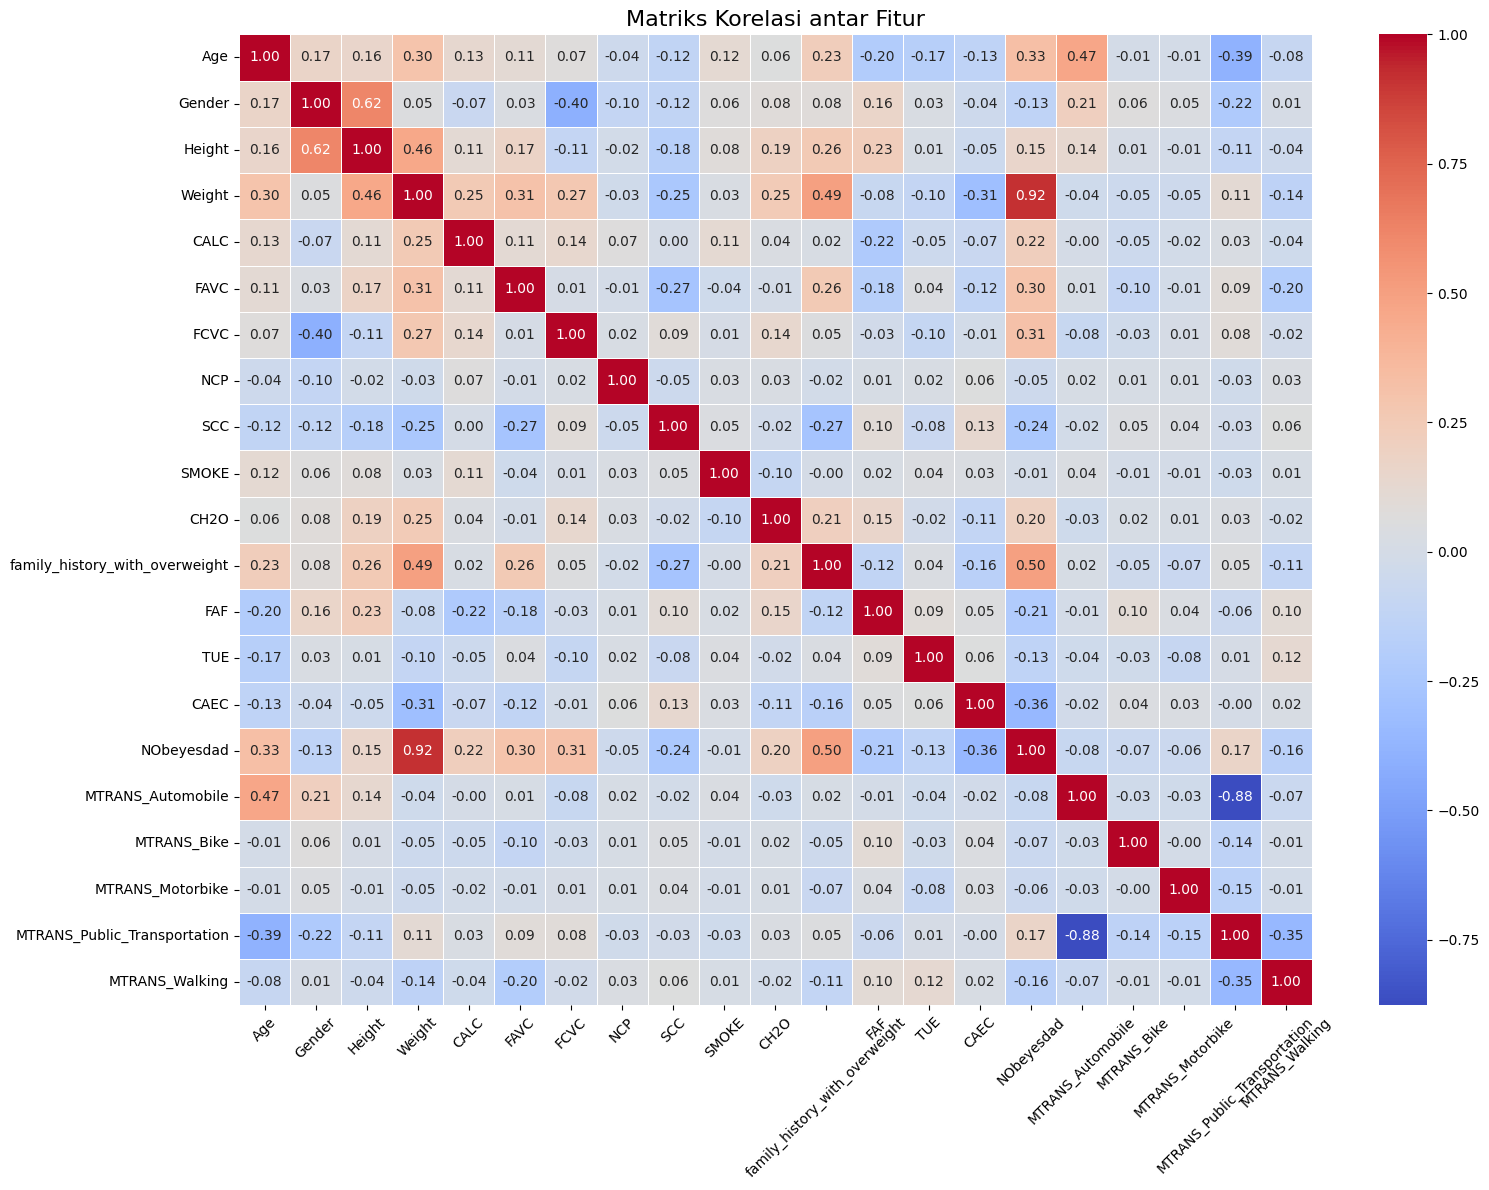

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antar semua kolom numerik
corr_matrix = df_bersih.corr(numeric_only=True)

# Tampilkan heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi antar Fitur", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()